### 전체 코드

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                48        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 600 samples
Epoch 1/200
1400/1400 - 1s - loss: 23.3530 - val_loss: 1.8171
Epoch 2/200
1400/1400 - 0s - loss: 1.6883 - val_loss: 1.5505
Epoch 3/200
1400/1400 - 0s - loss: 1.4621 - val_loss: 1.3661
Epoch 4/200
1400/1400 - 0s - loss: 1.2755 - val_loss: 1.1800
Epoch 5/200
1400/1400 - 0s - loss: 1.1189 - val_loss: 1.0308
Epoch 6/200
1400/1400 - 0s - loss: 0.9821 - val_loss: 0.9193
Epoch 7/200
1400/1400 - 0s - loss: 0.8618 - val_loss: 0.8061
Epoch 8/200
1400/1400 - 0s - loss: 0.7594 - val

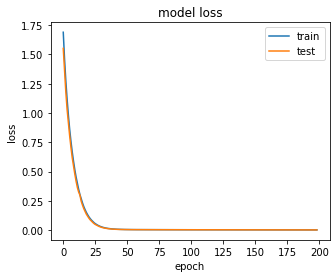

y actual value =  11.3
y predicted value = 11.227701


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers

def generator_sequential_model():

    model = Sequential( [
    Input(2, name = 'input_layer'),                             #첫 Layer에서 2개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()

#위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[0].get_weights())                      
#     print(model.layers[1].get_weights())

    model.compile(optimizer = 'sgd', loss = 'mse')
    return model 


def generator_linear_regression_dateset(numofsamples = 650,w1 = 3, w2 =5, b=10):
    np.random.seed(0)
    X = np.random.rand(numofsamples,2)         # 입력값을 랜덤으로 650개 생성
    coef = np.array([w1,w2])
    bias = b
    
    y = np.matmul(X,coef.transpose()) + bias    #matmul : 행렬곱
#     print(X, y)
#     print(X.shape,coef.shape, y.shape)

    return X, y

import matplotlib.pyplot as plt

def plot_loss_curve(history):
    plt.figure(figsize = (5,4))
    
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc ='upper right')
    
    plt.show()
    
def predict_new_sample(model, x, w1=3, w2=5, b = 10):
    
    x= x.reshape(1,2)
    y_pred = model.predict(x)[0][0]
    
    y_actual = w1*x[0][0] + w2*x[0][1] + b
    
    print('y actual value = ', y_actual)
    print('y predicted value =', y_pred)
    
    

model = generator_sequential_model()
X,y = generator_linear_regression_dateset(numofsamples = 2000)
histroy = model.fit(X, y, epochs =200, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)

predict_new_sample(model, np.array([0.1,0.2]))



-----------------------------------------------------

### 코드 분석

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers

# y = 3*x1 + 5*x2 + 10


.

### 모델 생성
input data가 2개   
hidden layer의 뉴런 16개   
따라서 2*16 + 16(bias) = 48개이다.  

In [52]:
def generator_sequential_model():

    model = Sequential( [
    Input(2, name = 'input_layer'),                             #첫 Layer에서 2개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42) ) ,# 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    #print(model.layers[0].get_weights())                       # w1 : weight 값 출력  -> 계속 변함
    #print(model.layers[1].get_weights())                      # w2 : weight 값 출력
#     model.summary()
    model.compile(optimizer = 'sgd', loss = 'mse')
    return model 


generator_sequential_model()

.


## linear regression 모델링

- Sample Data 생성  
  데이터 개수 >= [weight(파라미터)개수/ (1-정확도)]   
  65 / (1-0.9) = 650  
  따라서 650개 이상의  sample data 랜덤으로 설정  
 
- w1, w2, b 가중치와 bias 설정
- X : 샘플 데이터 랜덤으로 x1, x2 각 각 650개 생성
- 회귀계수(w1, w2) 행렬화
- matmul통해서 X와 coef 행렬곱
- sample data 통한 y 구현





In [4]:
def generator_linear_regression_dateset(numofsamples = 650,w1 = 3, w2 =5, b=10):
    np.random.seed(0)
    X = np.random.rand(numofsamples,2)         # 입력값을 랜덤으로 650개 생성
    coef = np.array([w1,w2])
    bias = b
    
    y = np.matmul(X,coef.transpose()) + bias    #matmul : 행렬곱
    return X, y

# generator_linear_regression_dateset()

.

   
## fit 함수 
- X, y 데이터 입력
- epochs : 몇 번 scan하며 모델을 만들지 결정 (충분히 주어야 학습이 된다.)
- verbose : 실제 training 할때의 과정에서 loss 값을 표현
- validation_split : 전체 데이터를 자체적으로 Train / Test 데이터로 나누어줌 ( 할당 값=a 이면, Train : 1-a만큼 사용 , Test에 a만큼 사용) 
   
1) model 구성  
2) data smaple 만들고  
3) 구성한 모델에 대해서 data sample 통해서 Training   -> fit 함수 이용   

In [35]:
# model = generator_sequential_model()
# generator_linear_regression_dateset()
# model.fit(X, y, epochs =30, verbose =2 , validation_split = 0.3)

model = generator_sequential_model()
X,y = generator_linear_regression_dateset(numofsamples = 1000)
history = model.fit(X, y, epochs =30, verbose =2 , validation_split = 0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/30
700/700 - 0s - loss: 35.6769 - val_loss: 2.4192
Epoch 2/30
700/700 - 0s - loss: 2.0656 - val_loss: 2.0028
Epoch 3/30
700/700 - 0s - loss: 1.8670 - val_loss: 1.8385
Epoch 4/30
700/700 - 0s - loss: 1.7116 - val_loss: 1.6855
Epoch 5/30
700/700 - 0s - loss: 1.5736 - val_loss: 1.5522
Epoch 6/30
700/700 - 0s - loss: 1.4448 - val_loss: 1.4321
Epoch 7/30
700/700 - 0s - loss: 1.3363 - val_loss: 1.3240
Epoch 8/30
700/700 - 0s - loss: 1.2347 - val_loss: 1.2214
Epoch 9/30
700/700 - 0s - loss: 1.1400 - val_loss: 1.1293
Epoch 10/30
700/700 - 0s - loss: 1.0564 - val_loss: 1.0465
Epoch 11/30
700/700 - 0s - loss: 0.9739 - val_loss: 0.9632
Epoch 12/30
700/700 - 0s - loss: 0.9048 - val_loss: 0.8899
Epoch 13/30
700/700 - 0s - loss: 0.8336 - val_loss: 0.8254
Epoch 14/30
700/700 - 0s - loss: 0.7708 - val_loss: 0.7593
Epoch 15/30
700/700 - 0s - loss: 0.7085 - val_loss: 0.6999
Epoch 16/30
700/700 - 0s - loss: 0.6516 - val_loss: 0.6621
Epoch 17/30
700/70

.

## plot_loss_curve Graph  
- history에 따라 나오는 값들(epoch가 증가함에따라 loss의 변화량) 그래프로 알아보기 위한 함수
- figure : 크기 
- 각 loss들을 plot
- 제목 x,y축 이름
- 각 곡선의 이름 라벨링

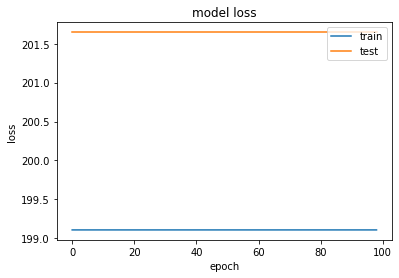

In [42]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
    plt.figure(figsize = (6,4))
    
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc ='upper right')
    
    plt.show()
    
plot_loss_curve(histroy)

In [43]:
histroy1 = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
histroy2 = model.fit(X, y, epochs =90, verbose =2 , validation_split = 0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 - 0s - loss: 0.1791 - val_loss: 0.1746
Epoch 2/50
700/700 - 0s - loss: 0.1637 - val_loss: 0.1592
Epoch 3/50
700/700 - 0s - loss: 0.1492 - val_loss: 0.1455
Epoch 4/50
700/700 - 0s - loss: 0.1372 - val_loss: 0.1323
Epoch 5/50
700/700 - 0s - loss: 0.1245 - val_loss: 0.1211
Epoch 6/50
700/700 - 0s - loss: 0.1137 - val_loss: 0.1102
Epoch 7/50
700/700 - 0s - loss: 0.1035 - val_loss: 0.1004
Epoch 8/50
700/700 - 0s - loss: 0.0946 - val_loss: 0.0917
Epoch 9/50
700/700 - 0s - loss: 0.0863 - val_loss: 0.0846
Epoch 10/50
700/700 - 0s - loss: 0.0790 - val_loss: 0.0767
Epoch 11/50
700/700 - 0s - loss: 0.0721 - val_loss: 0.0701
Epoch 12/50
700/700 - 0s - loss: 0.0660 - val_loss: 0.0642
Epoch 13/50
700/700 - 0s - loss: 0.0606 - val_loss: 0.0582
Epoch 14/50
700/700 - 0s - loss: 0.0554 - val_loss: 0.0533
Epoch 15/50
700/700 - 0s - loss: 0.0513 - val_loss: 0.0490
Epoch 16/50
700/700 - 0s - loss: 0.0468 - val_loss: 0.0448
Epoch 17/50
700/700

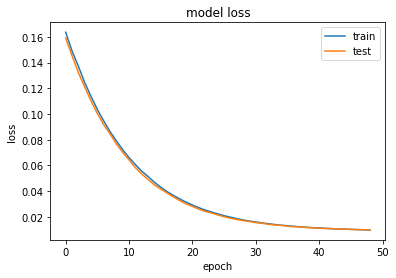

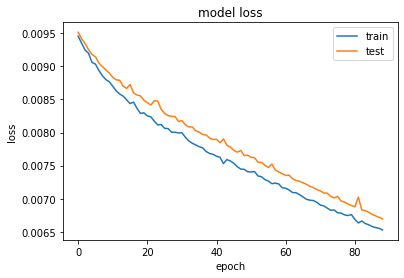

In [44]:
plot_loss_curve(histroy1)
plot_loss_curve(histroy2 )

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 - 0s - loss: 0.0065 - val_loss: 0.0067
Epoch 2/100
700/700 - 0s - loss: 0.0065 - val_loss: 0.0067
Epoch 3/100
700/700 - 0s - loss: 0.0065 - val_loss: 0.0067
Epoch 4/100
700/700 - 0s - loss: 0.0064 - val_loss: 0.0066
Epoch 5/100
700/700 - 0s - loss: 0.0064 - val_loss: 0.0066
Epoch 6/100
700/700 - 0s - loss: 0.0064 - val_loss: 0.0066
Epoch 7/100
700/700 - 0s - loss: 0.0064 - val_loss: 0.0066
Epoch 8/100
700/700 - 0s - loss: 0.0063 - val_loss: 0.0066
Epoch 9/100
700/700 - 0s - loss: 0.0063 - val_loss: 0.0065
Epoch 10/100
700/700 - 0s - loss: 0.0063 - val_loss: 0.0065
Epoch 11/100
700/700 - 0s - loss: 0.0063 - val_loss: 0.0065
Epoch 12/100
700/700 - 0s - loss: 0.0063 - val_loss: 0.0065
Epoch 13/100
700/700 - 0s - loss: 0.0063 - val_loss: 0.0065
Epoch 14/100
700/700 - 0s - loss: 0.0063 - val_loss: 0.0064
Epoch 15/100
700/700 - 0s - loss: 0.0062 - val_loss: 0.0064
Epoch 16/100
700/700 - 0s - loss: 0.0062 - val_loss: 0.0064
Epo

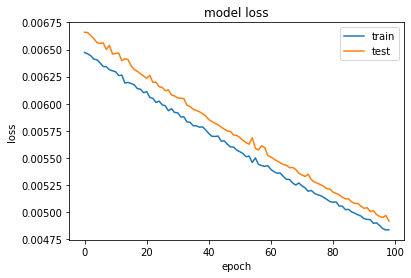

In [45]:
histroy2 = model.fit(X, y, epochs =100, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy2 )

위에서 볼 수 있듯이 epochs 값이 증가함에 따라 loss가 감소함을 볼 수 있다.  
따라서 비슷하던 곡선 epoch - loss 곡선도 선형모형에 비슷한 직선으로 변화가 되어가고있다.  

.


또한 sample의 개수에 따른 아래의 그래프 변화를 관찰해보면, 

sample의 개수가 증가할 수록 loss의 범위도 작아지게 된다.
sample의 개수가 50일때 loss의 범위는 20단위로 140이상까지 증가하게 된다. 

하지만 sample 개수가 100개 일때는, loss의 범위가 모두 2 이하로 나타나게 된다.



Train on 35 samples, validate on 15 samples
Epoch 1/30
35/35 - 0s - loss: 186.6764 - val_loss: 112.0981
Epoch 2/30
35/35 - 0s - loss: 123.2945 - val_loss: 67.2892
Epoch 3/30
35/35 - 0s - loss: 76.3136 - val_loss: 41.6775
Epoch 4/30
35/35 - 0s - loss: 48.4917 - val_loss: 23.0688
Epoch 5/30
35/35 - 0s - loss: 27.9126 - val_loss: 10.9926
Epoch 6/30
35/35 - 0s - loss: 14.3956 - val_loss: 6.0320
Epoch 7/30
35/35 - 0s - loss: 8.3936 - val_loss: 3.1395
Epoch 8/30
35/35 - 0s - loss: 4.6650 - val_loss: 1.9767
Epoch 9/30
35/35 - 0s - loss: 2.9762 - val_loss: 1.7481
Epoch 10/30
35/35 - 0s - loss: 2.5096 - val_loss: 1.4937
Epoch 11/30
35/35 - 0s - loss: 1.8876 - val_loss: 1.4765
Epoch 12/30
35/35 - 0s - loss: 1.6908 - val_loss: 1.4982
Epoch 13/30
35/35 - 0s - loss: 1.5895 - val_loss: 1.5168
Epoch 14/30
35/35 - 0s - loss: 1.5619 - val_loss: 1.4558
Epoch 15/30
35/35 - 0s - loss: 1.6285 - val_loss: 1.4545
Epoch 16/30
35/35 - 0s - loss: 1.5963 - val_loss: 1.5181
Epoch 17/30
35/35 - 0s - loss: 1.4999 -

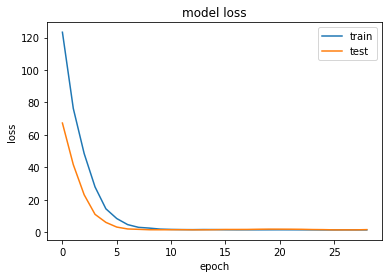

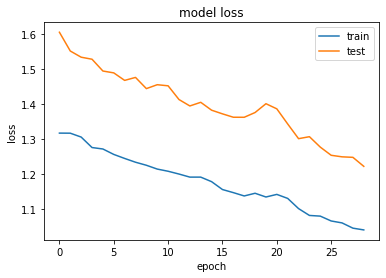

In [11]:
model = generator_sequential_model()
X1,y1 = generator_linear_regression_dateset(numofsamples = 50)
X2,y2 = generator_linear_regression_dateset(numofsamples = 100)
histroy1 = model.fit(X1, y1, epochs =30, verbose =2 , validation_split = 0.3)
histroy2 = model.fit(X2, y2, epochs =30, verbose =2 , validation_split = 0.3)

plot_loss_curve(histroy1)
plot_loss_curve(histroy2)

그러면 sample의 개수가 적을때, epochs 값을 증가시키면 어떻게 될까? 


Train on 35 samples, validate on 15 samples
Epoch 1/30
35/35 - 0s - loss: 184.3510 - val_loss: 108.5484
Epoch 2/30
35/35 - 0s - loss: 121.1955 - val_loss: 70.2818
Epoch 3/30
35/35 - 0s - loss: 80.1354 - val_loss: 40.6224
Epoch 4/30
35/35 - 0s - loss: 48.2189 - val_loss: 23.1474
Epoch 5/30
35/35 - 0s - loss: 28.8373 - val_loss: 12.7537
Epoch 6/30
35/35 - 0s - loss: 16.8438 - val_loss: 6.6802
Epoch 7/30
35/35 - 0s - loss: 9.5695 - val_loss: 4.1570
Epoch 8/30
35/35 - 0s - loss: 6.1634 - val_loss: 2.4169
Epoch 9/30
35/35 - 0s - loss: 3.6558 - val_loss: 2.0805
Epoch 10/30
35/35 - 0s - loss: 2.9797 - val_loss: 1.7961
Epoch 11/30
35/35 - 0s - loss: 2.2308 - val_loss: 1.8100
Epoch 12/30
35/35 - 0s - loss: 1.8629 - val_loss: 1.9132
Epoch 13/30
35/35 - 0s - loss: 1.7654 - val_loss: 2.0723
Epoch 14/30
35/35 - 0s - loss: 1.7375 - val_loss: 1.7887
Epoch 15/30
35/35 - 0s - loss: 1.8145 - val_loss: 1.7076
Epoch 16/30
35/35 - 0s - loss: 1.9336 - val_loss: 1.6953
Epoch 17/30
35/35 - 0s - loss: 1.8996 -

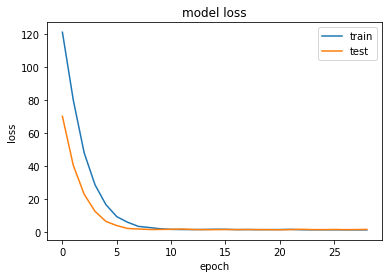

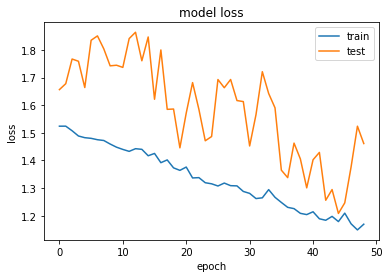

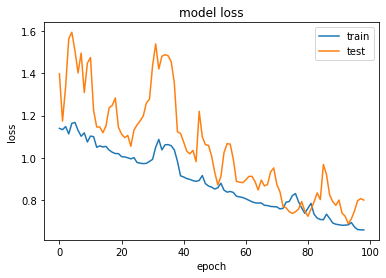

In [46]:
model = generator_sequential_model()
X1,y1 = generator_linear_regression_dateset(numofsamples = 50)
histroy1 = model.fit(X1, y1, epochs =30, verbose =2 , validation_split = 0.3)
histroy2 = model.fit(X1, y1, epochs =50, verbose =2 , validation_split = 0.3)
histroy3 = model.fit(X1, y1, epochs =100, verbose =2 , validation_split = 0.3)

plot_loss_curve(histroy1)
plot_loss_curve(histroy2)
plot_loss_curve(histroy3)

위에서 볼 수 있듯이 epoch값이 많으면 많아질수록 loss가 감소하지만, 일정량이 되면 그 감소 범위도 줄어들게 된다.
하지만 sample data가 많아지는것에비해 epochs만 증가하는 것은 큰 변동(불안정)이 있다.
따라서 sample data를 많이 확보하는것이 정확도를 높일수 있게된다.

### 따라서 sample개수는 많으면 많을수록 좋다. 
### 왜냐하면 tensorflow는 딥러닝기반, 다시말해서 복잡한 신경망(Deep Neural Network) 기반이기때문에
### 데이터가 많으면 많을 수록 더 좋은 성능을 나타낼 수 있다. (loss 비용 감소)

Train on 700 samples, validate on 300 samples
Epoch 1/300
700/700 - 0s - loss: 44.5125 - val_loss: 2.3289
Epoch 2/300
700/700 - 0s - loss: 1.9675 - val_loss: 1.9331
Epoch 3/300
700/700 - 0s - loss: 1.7922 - val_loss: 1.7802
Epoch 4/300
700/700 - 0s - loss: 1.6563 - val_loss: 1.6489
Epoch 5/300
700/700 - 0s - loss: 1.5398 - val_loss: 1.5362
Epoch 6/300
700/700 - 0s - loss: 1.4350 - val_loss: 1.4404
Epoch 7/300
700/700 - 0s - loss: 1.3381 - val_loss: 1.3322
Epoch 8/300
700/700 - 0s - loss: 1.2438 - val_loss: 1.2694
Epoch 9/300
700/700 - 0s - loss: 1.1671 - val_loss: 1.1639
Epoch 10/300
700/700 - 0s - loss: 1.0887 - val_loss: 1.0882
Epoch 11/300
700/700 - 0s - loss: 1.0242 - val_loss: 1.0187
Epoch 12/300
700/700 - 0s - loss: 0.9577 - val_loss: 0.9539
Epoch 13/300
700/700 - 0s - loss: 0.8970 - val_loss: 0.8994
Epoch 14/300
700/700 - 0s - loss: 0.8394 - val_loss: 0.8381
Epoch 15/300
700/700 - 0s - loss: 0.7845 - val_loss: 0.7858
Epoch 16/300
700/700 - 0s - loss: 0.7385 - val_loss: 0.7416
Ep

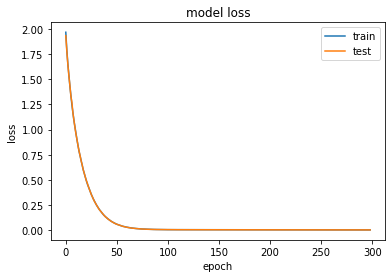

In [53]:
model = generator_sequential_model()
X1,y1 = generator_linear_regression_dateset(numofsamples = 1000)
histroy1 = model.fit(X1, y1, epochs =300, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy1)

loss = 0.0034 , val_loss = 0.0034
이처럼 0에 수렴하는 값을 할당받을 수 있다.

.

### 이제 예측을 해보겠습니다.

- model은 


In [14]:
def predict_new_sample(model, x, w1=3, w2=5, b = 10):
    
    x= x.reshape(1,2)
    y_pred = model.predict(x)[0][0]
    
    y_actual = w1*x[0][0] + w2*x[0][1] + b
    
    print('y actual value = ', y_actual)
    print('y predicted value =', y_pred)
    

Train on 35 samples, validate on 15 samples
Epoch 1/50
35/35 - 0s - loss: 0.0029 - val_loss: 0.0019
Epoch 2/50
35/35 - 0s - loss: 0.0029 - val_loss: 0.0019
Epoch 3/50
35/35 - 0s - loss: 0.0030 - val_loss: 0.0019
Epoch 4/50
35/35 - 0s - loss: 0.0030 - val_loss: 0.0019
Epoch 5/50
35/35 - 0s - loss: 0.0031 - val_loss: 0.0019
Epoch 6/50
35/35 - 0s - loss: 0.0030 - val_loss: 0.0019
Epoch 7/50
35/35 - 0s - loss: 0.0029 - val_loss: 0.0019
Epoch 8/50
35/35 - 0s - loss: 0.0030 - val_loss: 0.0019
Epoch 9/50
35/35 - 0s - loss: 0.0028 - val_loss: 0.0020
Epoch 10/50
35/35 - 0s - loss: 0.0028 - val_loss: 0.0022
Epoch 11/50
35/35 - 0s - loss: 0.0028 - val_loss: 0.0019
Epoch 12/50
35/35 - 0s - loss: 0.0028 - val_loss: 0.0020
Epoch 13/50
35/35 - 0s - loss: 0.0028 - val_loss: 0.0020
Epoch 14/50
35/35 - 0s - loss: 0.0028 - val_loss: 0.0022
Epoch 15/50
35/35 - 0s - loss: 0.0028 - val_loss: 0.0021
Epoch 16/50
35/35 - 0s - loss: 0.0028 - val_loss: 0.0022
Epoch 17/50
35/35 - 0s - loss: 0.0028 - val_loss: 0.0

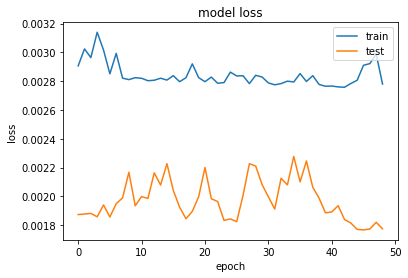

y actual value =  11.3
y predicted value = 11.224064


In [54]:
X,y = generator_linear_regression_dateset(numofsamples = 50)
histroy = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))

Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 - 0s - loss: 0.0034 - val_loss: 0.0048
Epoch 2/50
210/210 - 0s - loss: 0.0034 - val_loss: 0.0048
Epoch 3/50
210/210 - 0s - loss: 0.0034 - val_loss: 0.0049
Epoch 4/50
210/210 - 0s - loss: 0.0034 - val_loss: 0.0049
Epoch 5/50
210/210 - 0s - loss: 0.0034 - val_loss: 0.0050
Epoch 6/50
210/210 - 0s - loss: 0.0034 - val_loss: 0.0050
Epoch 7/50
210/210 - 0s - loss: 0.0034 - val_loss: 0.0049
Epoch 8/50
210/210 - 0s - loss: 0.0034 - val_loss: 0.0049
Epoch 9/50
210/210 - 0s - loss: 0.0033 - val_loss: 0.0049
Epoch 10/50
210/210 - 0s - loss: 0.0033 - val_loss: 0.0048
Epoch 11/50
210/210 - 0s - loss: 0.0033 - val_loss: 0.0049
Epoch 12/50
210/210 - 0s - loss: 0.0033 - val_loss: 0.0049
Epoch 13/50
210/210 - 0s - loss: 0.0033 - val_loss: 0.0049
Epoch 14/50
210/210 - 0s - loss: 0.0033 - val_loss: 0.0048
Epoch 15/50
210/210 - 0s - loss: 0.0033 - val_loss: 0.0049
Epoch 16/50
210/210 - 0s - loss: 0.0033 - val_loss: 0.0049
Epoch 17/50
210/210 

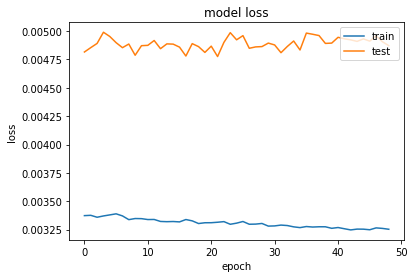

y actual value =  11.3
y predicted value = 11.231399


In [55]:
X,y = generator_linear_regression_dateset(numofsamples = 300)
histroy = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))


Train on 35 samples, validate on 15 samples
Epoch 1/20
35/35 - 0s - loss: 0.0027 - val_loss: 0.0016
Epoch 2/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 3/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 4/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 5/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0017
Epoch 6/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0017
Epoch 7/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0017
Epoch 8/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 9/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 10/20
35/35 - 0s - loss: 0.0027 - val_loss: 0.0015
Epoch 11/20
35/35 - 0s - loss: 0.0027 - val_loss: 0.0016
Epoch 12/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0017
Epoch 13/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 14/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 15/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0017
Epoch 16/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0018
Epoch 17/20
35/35 - 0s - loss: 0.0026 - val_loss: 0.0

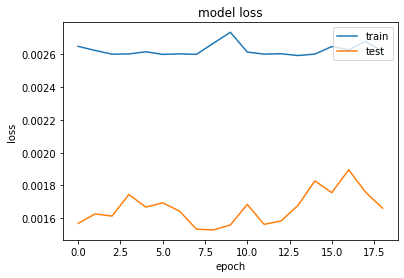

y actual value =  11.3
y predicted value = 11.222929


In [56]:
X,y = generator_linear_regression_dateset(numofsamples = 50)
histroy = model.fit(X, y, epochs =20, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))


Train on 35 samples, validate on 15 samples
Epoch 1/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 2/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 3/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 4/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 5/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0017
Epoch 6/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0018
Epoch 7/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 8/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 9/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 10/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0017
Epoch 11/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 12/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0017
Epoch 13/50
35/35 - 0s - loss: 0.0026 - val_loss: 0.0019
Epoch 14/50
35/35 - 0s - loss: 0.0027 - val_loss: 0.0019
Epoch 15/50
35/35 - 0s - loss: 0.0027 - val_loss: 0.0019
Epoch 16/50
35/35 - 0s - loss: 0.0027 - val_loss: 0.0020
Epoch 17/50
35/35 - 0s - loss: 0.0027 - val_loss: 0.0

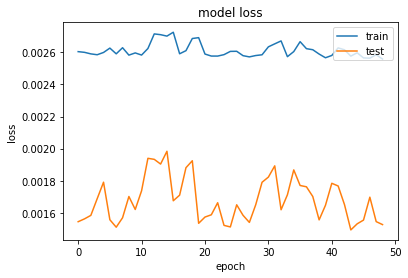

y actual value =  11.3
y predicted value = 11.228881


In [57]:
X,y = generator_linear_regression_dateset(numofsamples = 50)
histroy = model.fit(X, y, epochs =50, verbose =2 , validation_split = 0.3)
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))


In [58]:
X,y = generator_linear_regression_dateset(numofsamples = 1000)
histroy = model.fit(X, y, epochs =100, verbose =2 , validation_split = 0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 - 0s - loss: 0.0040 - val_loss: 0.0040
Epoch 2/100
700/700 - 0s - loss: 0.0040 - val_loss: 0.0040
Epoch 3/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0040
Epoch 4/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0040
Epoch 5/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0040
Epoch 6/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0040
Epoch 7/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0040
Epoch 8/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0040
Epoch 9/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0039
Epoch 10/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0039
Epoch 11/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0039
Epoch 12/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0039
Epoch 13/100
700/700 - 0s - loss: 0.0039 - val_loss: 0.0039
Epoch 14/100
700/700 - 0s - loss: 0.0038 - val_loss: 0.0039
Epoch 15/100
700/700 - 0s - loss: 0.0038 - val_loss: 0.0039
Epoch 16/100
700/700 - 0s - loss: 0.0038 - val_loss: 0.0039
Epo

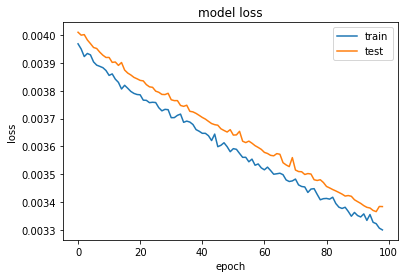

y actual value =  11.3
y predicted value = 11.227137


In [59]:
plot_loss_curve(histroy)
predict_new_sample(model, np.array([0.1,0.2]))

## 결론
  
tensorflow의 keras를 통해 신경망으로 선형회귀문제를 풀었습니다.  
실제 값 11.3에 11.262 까지 근접한 값을 얻을 수 있었으므로, 선형회귀문제를 풀었다고 할 수 있습니다.  
  
따라서 이처럼 딥러닝(신경망)으로 선형회귀 문제를 풀 수 있고, 다른 문제들도 풀 수 있다고 합니다.  
전제 조건으로는, 학습시키기에 충분한 데이터가 주어진다면 입니다.  

#### 따라서, 충분한 데이터가 주어지고 성능이 좋은 컴퓨터가있다면, 딥러닝을통해 많은 머신러닝 문제를 풀 수 있게 됩니다!



